#Step 1: Import Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

#Step 2: Load the Dataset

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_csv('/content/drive/MyDrive/DM/Classification/ObesityDataSet.csv')



Mounted at /content/drive/


In [ ]:
# Handle categorical data using Label Encoding or One-Hot Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#Step 3: Define Features (X) and Target (y)

In [ ]:

X = data.drop('NObeyesdad', axis=1)  # Features
y = data['NObeyesdad']  # Target


In [ ]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Convert target to categorical
y = to_categorical(y)

# Step 4: Split Data into Train and Test Sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Step 5: Build the Neural Network Model

In [ ]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Softmax for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 6: Train the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1722 - loss: 2.0471 - val_accuracy: 0.4852 - val_loss: 1.6521
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3647 - loss: 1.7096 - val_accuracy: 0.5414 - val_loss: 1.3678
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4816 - loss: 1.4171 - val_accuracy: 0.5917 - val_loss: 1.1594
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5275 - loss: 1.2505 - val_accuracy: 0.6568 - val_loss: 1.0318
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5422 - loss: 1.1838 - val_accuracy: 0.6509 - val_loss: 0.9403
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5884 - loss: 1.0791 - val_accuracy: 0.6657 - val_loss: 0.8779
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5980 - loss: 1.0293 - val_accuracy: 0.6716 - val_loss: 0.8254
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 0.9651 - val_accuracy: 0.7041 - val_loss:

# Step 7: Evaluate the *Model*

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8995 - loss: 0.2375 
Test Accuracy: 0.9125295281410217


# Step 8: Generate Predictions and Evaluate

In [ ]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.88      0.68      0.76        62
           2       0.97      0.95      0.96        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.83      0.86      0.84        56
           6       0.92      0.92      0.92        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



# Step 9: Visualize Training Results

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

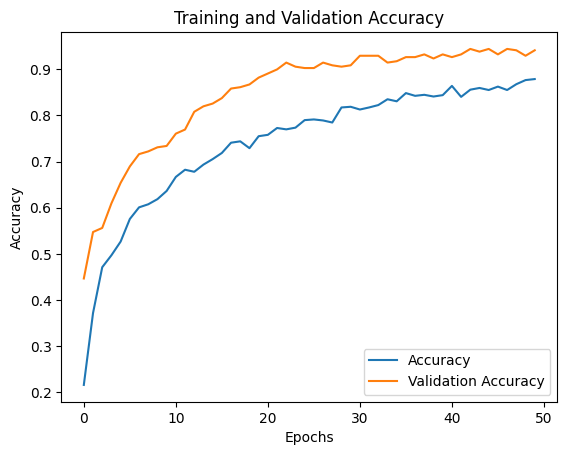

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

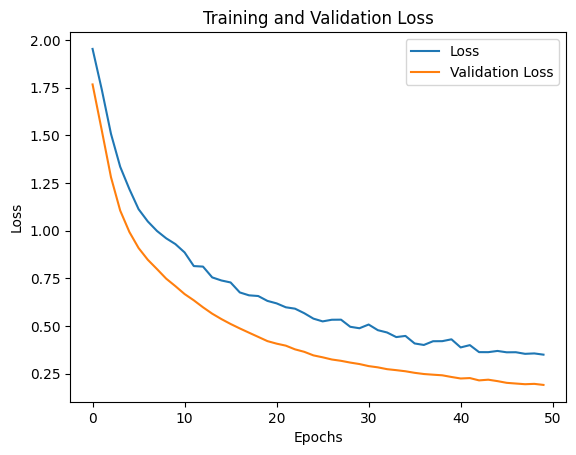

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

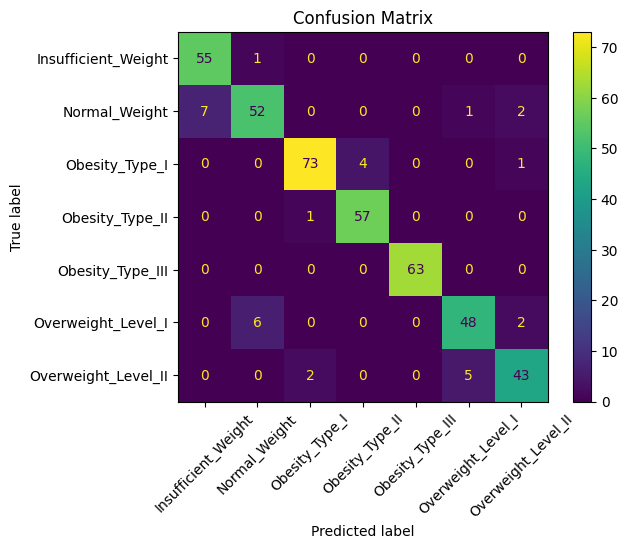

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders['NObeyesdad'].classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save the Model
model.save('obesity_classification_model.h5')
print("Model saved as 'obesity_classification_model.h5'.")


Model saved as 'obesity_classification_model.h5'.
